In [1]:
# Add pandas as dependency

import pandas as pd

import os

import matplotlib.pyplot as plt

In [2]:
# Files to load

netflix_data_to_load = "Resources/final_clean_data.csv"

In [3]:
# Read the data and store it in Pandas DataFrame

netflix_data_df = pd.read_csv(netflix_data_to_load)

netflix_data_df.head()

,title,year released,certificate,duration_min,genre,rating,votes,age
0,Scarface,1932,PG,93,Action,7.7,"28,107",90
1,Dumbo,1941,G,64,Animation,7.2,"131,896",81
2,Nazi Concentration Camps,1945,Not Rated,59,Documentary,8.3,"1,481",77
3,Know Your Enemy - Japan,1945,Not Rated,63,Documentary,6.0,800,77
4,Along Came Jones,1945,Approved,90,Comedy,6.4,"2,163",77


In [4]:
# Determine if there is any missing values in the data

netflix_data_df.count()

title            5511
year released    5511
certificate      5511
duration_min     5511
genre            5511
rating           5511
votes            5511
age              5511
dtype: int64

In [5]:
# Determine if there is any missing values in data

netflix_data_df.isnull()

,title,year released,certificate,duration_min,genre,rating,votes,age
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
5506,False,False,False,False,False,False,False,False
5507,False,False,False,False,False,False,False,False
5508,False,False,False,False,False,False,False,False
5509,False,False,False,False,False,False,False,False


In [6]:
netflix_data_df.columns

Index(['title', 'year released', 'certificate', 'duration_min', 'genre ',
       'rating', 'votes', 'age'],
      dtype='object')

In [7]:
netflix_data_df.reset_index()

,index,title,year released,certificate,duration_min,genre,rating,votes,age
0,0,Scarface,1932,PG,93,Action,7.7,"28,107",90
1,1,Dumbo,1941,G,64,Animation,7.2,"131,896",81
2,2,Nazi Concentration Camps,1945,Not Rated,59,Documentary,8.3,"1,481",77
3,3,Know Your Enemy - Japan,1945,Not Rated,63,Documentary,6.0,800,77
4,4,Along Came Jones,1945,Approved,90,Comedy,6.4,"2,163",77
...,...,...,...,...,...,...,...,...,...
5506,5506,Hurts Like Hell,2022,TV-MA,200,Biography,7.4,247,0
5507,5507,Toolsidas Junior,2022,TV-14,132,Drama,7.4,"2,162",0
5508,5508,Incantation,2022,TV-MA,110,Horror,6.2,"11,424",0
5509,5509,Fortune Seller: A TV Scam,2022,TV-14,45,Documentary,6.4,69,0


In [8]:
adjusted_df = netflix_data_df.drop(columns = ['votes', 'age'])

adjusted_df

,title,year released,certificate,duration_min,genre,rating
0,Scarface,1932,PG,93,Action,7.7
1,Dumbo,1941,G,64,Animation,7.2
2,Nazi Concentration Camps,1945,Not Rated,59,Documentary,8.3
3,Know Your Enemy - Japan,1945,Not Rated,63,Documentary,6.0
4,Along Came Jones,1945,Approved,90,Comedy,6.4
...,...,...,...,...,...,...
5506,Hurts Like Hell,2022,TV-MA,200,Biography,7.4
5507,Toolsidas Junior,2022,TV-14,132,Drama,7.4
5508,Incantation,2022,TV-MA,110,Horror,6.2
5509,Fortune Seller: A TV Scam,2022,TV-14,45,Documentary,6.4


In [9]:
adjusted_df.columns

Index(['title', 'year released', 'certificate', 'duration_min', 'genre ',
       'rating'],
      dtype='object')

In [10]:
adjusted_df['year released'] = adjusted_df['year released'].astype('int')

<AxesSubplot:xlabel='year released'>

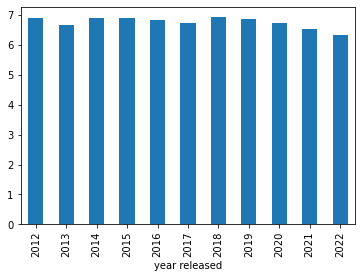

In [12]:
rating_graph = adjusted_df.loc[adjusted_df['year released'] > 2011]
rating_graph = rating_graph.groupby(['year released'])['rating'].mean()

rating_graph.plot(kind = 'bar')

#label graph Average movie rating for last decade (2012 - 2022)

<BarContainer object of 10 artists>

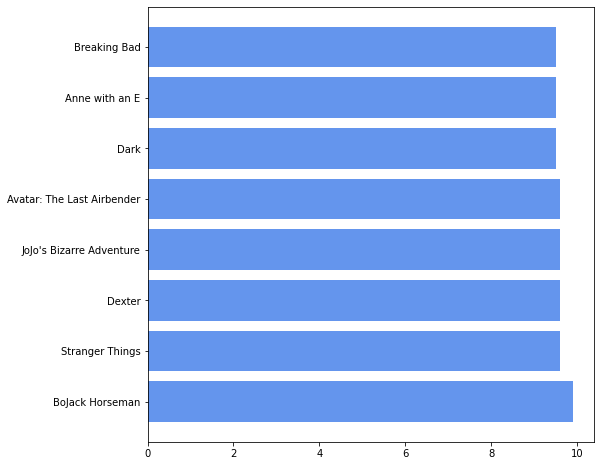

In [14]:
top_10_movies = adjusted_df.sort_values('rating', ascending = False).head(10)

plt.figure(figsize = (8, 8))

plt.barh(top_10_movies['title'], top_10_movies['rating'], color = "cornflowerblue")

#label graph Top 10 movies ratings in entire dataset (1932 - 2022)

In [ ]:
# genre vs. rating graph

# scatter plot for movie duration



In [15]:
adjusted_df['rating category'] = pd.cut(x = adjusted_df['rating'],
                                       bins = [1, 4, 7, 10],
                                       labels = ['Bad', 'Good', 'Excellent'])

adjusted_df

,title,year released,certificate,duration_min,genre,rating,rating category
0,Scarface,1932,PG,93,Action,7.7,Excellent
1,Dumbo,1941,G,64,Animation,7.2,Excellent
2,Nazi Concentration Camps,1945,Not Rated,59,Documentary,8.3,Excellent
3,Know Your Enemy - Japan,1945,Not Rated,63,Documentary,6.0,Good
4,Along Came Jones,1945,Approved,90,Comedy,6.4,Good
...,...,...,...,...,...,...,...
5506,Hurts Like Hell,2022,TV-MA,200,Biography,7.4,Excellent
5507,Toolsidas Junior,2022,TV-14,132,Drama,7.4,Excellent
5508,Incantation,2022,TV-MA,110,Horror,6.2,Good
5509,Fortune Seller: A TV Scam,2022,TV-14,45,Documentary,6.4,Good
